In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy.signal import find_peaks
#funcion
#y1(3,t)= 1,50 cos(0,462*3-157t+0,00)
def y1(t, x=3):
  return 1.50 * math.cos(0.462*x -157*t + 0)
#y2(3,t)= 1,50 cos(0,556*3-188t+pi/4)
def y2(t, x=3):
  desfase = math.pi/4
  return 1.50 * math.cos(0.556*x -188*t + desfase)

t_valores = []
i = 0.0001
while i <= 1.0000:
  i = round(i,4)
  t_valores.append(i)
  i += 0.0001

def formato_tres_cifras_significativas(valor,pos):
  texto = str(valor)
  texto = texto.split(".")
  if(valor == 0.000):
    return "0,00"
  if(texto[0].find('-') == 0):
    texto[0] = texto[0].replace("-","")
    if(texto[0] == '0' and len(texto) == 1):
      word = f"{valor:.3f}"
      word = word.replace(".",",")
      return word
    else:
      parteZ = len(texto[0])
      if(parteZ == 1):
        word = f"{valor:.2f}"
        word = word.replace(".",",")
        return word
  else:
    if(texto[0] == '0'):
      word = f"{valor:.3f}"
      word = word.replace(".",",")
      return word
    else:
      parteZ = len(texto[0])
      if(parteZ == 1):
        word = f"{valor:.2f}"
        word = word.replace(".",",")
        return word

y1_valores = [y1(t) for t in t_valores]
y2_valores = [y2(t) for t in t_valores]

Text(0, 0.5, 'función de onda (m)')

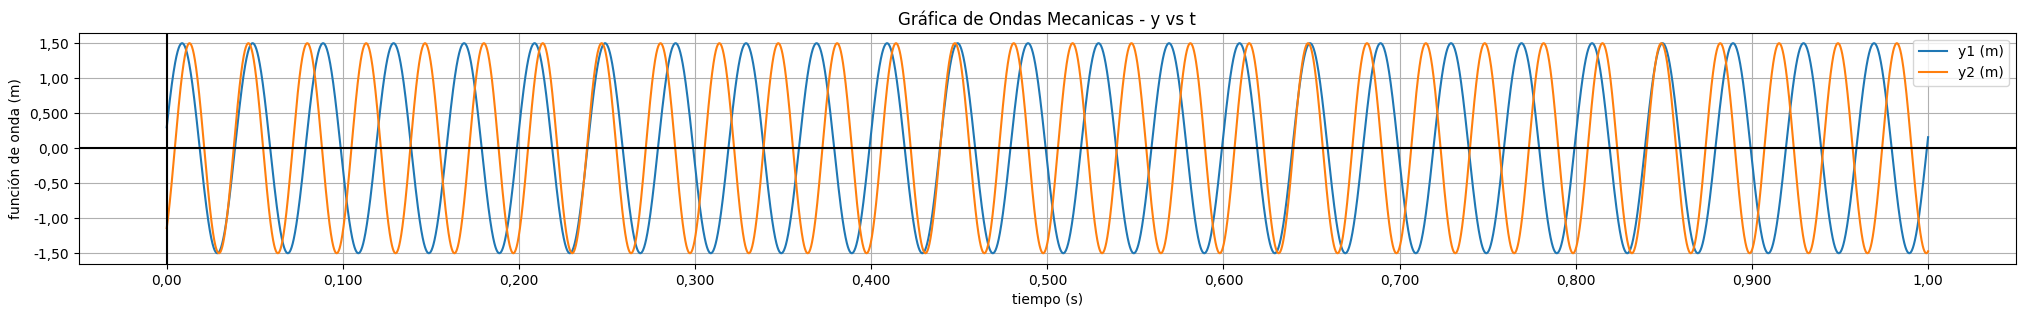

In [2]:
ticks= []
ind = 0.000
while ind <= 1.000:
  ind = round(ind,3)
  ticks.append(ind)
  ind += 0.100
plt.figure(figsize = (25,3))
plt.grid(True)
plt.plot(t_valores,y1_valores,label = "y1 (m)")
plt.plot(t_valores,y2_valores,label = "y2 (m)")
plt.title("Gráfica de Ondas Mecanicas - y vs t")
plt.legend(loc=1)
plt.axhline(0,color = "black")
plt.axvline(0,color = "black")
plt.xticks(ticks)
plt.gca().xaxis.set_major_formatter(formato_tres_cifras_significativas)
plt.gca().yaxis.set_major_formatter(formato_tres_cifras_significativas)
plt.xlabel("tiempo (s)")
plt.ylabel("función de onda (m)")


[0.131, 0.332, 0.533, 0.734, 0.935]


Text(0, 0.5, 'función de onda (m)')

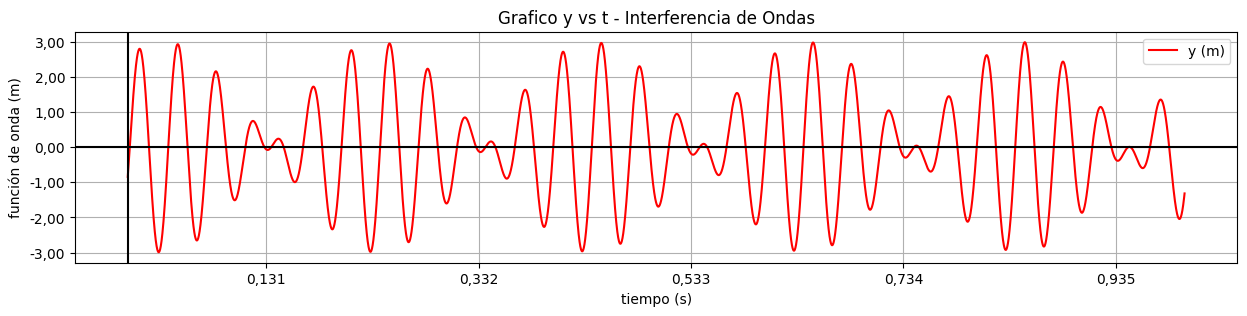

In [3]:
#INTERFERENCIA DE ONDAS
#y(x,t) = y1(x,t) + y2(x,t)
#y(3,t) = y1(3,t) + y2(3,t)
#y(3,t) = 1,50 cos(0,462*3- 157t+0,00) + 1,50 cos(0,556*3-188t+pi/4)

def y(t, x = 3):
  desfase_y2 = math.pi/4
  return (1.50 * math.cos(0.462*x -157*t + 0)) + (1.50 * math.cos(0.556*x -188*t + desfase_y2))

y_valores = [y(t) for t in t_valores]
ticks_con_pulso = []
val = 0.131
while val <= 1.000:
  val = round(val,3)
  ticks_con_pulso.append(val)
  val += 0.201
print(ticks_con_pulso)
plt.figure(figsize = (15,3))
plt.grid(True)
plt.plot(t_valores,y_valores, color ="red",label = "y (m)")
plt.title("Grafico y vs t - Interferencia de Ondas")
plt.xticks(ticks_con_pulso)
plt.axhline(0,color = "black")
plt.axvline(0,color = "black")
plt.gca().xaxis.set_major_formatter(formato_tres_cifras_significativas)
plt.gca().yaxis.set_major_formatter(formato_tres_cifras_significativas)
plt.legend()
plt.xlabel("tiempo (s)")
plt.ylabel("función de onda (m)")


=== COORDENADAS DE LOS MÁXIMOS ===
Tiempo (s)	Amplitud (m)
------------------------------
0.0474		2.9386
0.1186		0.7514
0.1758		1.7290
0.2478		2.9586
0.3191		0.8516
0.3762		1.6397
0.4482		2.9746
0.5196		0.9518
0.5766		1.5484
0.6485		2.9868
0.7201		1.0514
0.7770		1.4553
0.8489		2.9950
0.9205		1.1502
0.9774		1.3605

=== ANÁLISIS DE FRECUENCIA DE PULSO ===
Períodos entre máximos: [0.0712 0.0572 0.072  0.0713 0.0571 0.072  0.0714 0.057  0.0719 0.0716
 0.0569 0.0719 0.0716 0.0569]
Período promedio: 0.0664 s
Frecuencia de pulso: 15.0538 Hz


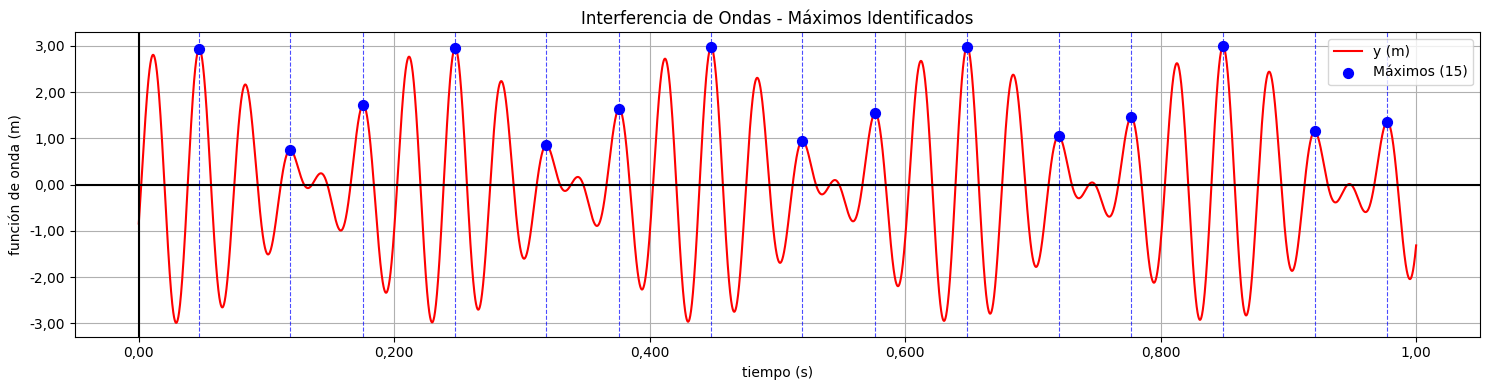

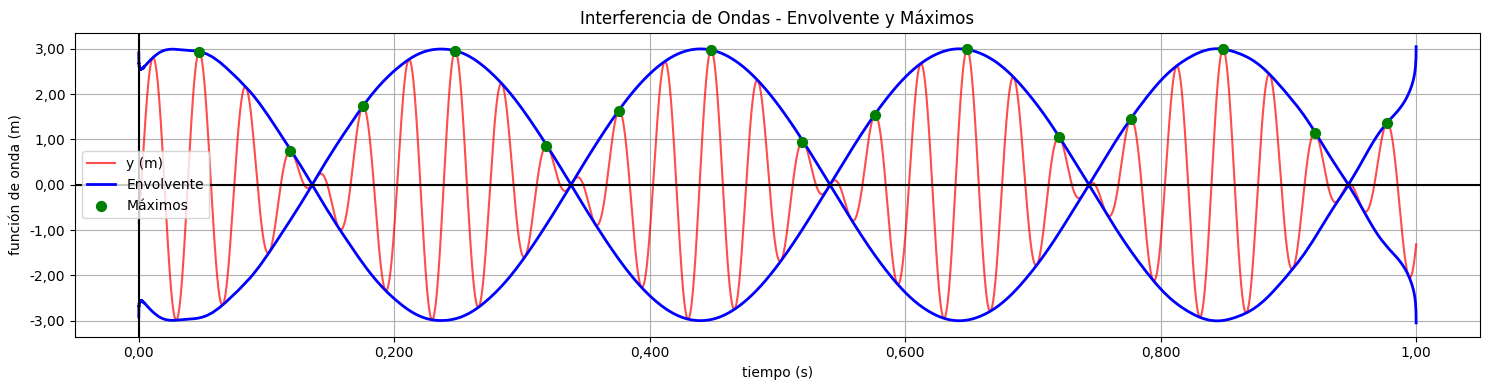

In [4]:
# ANÁLISIS DE MÁXIMOS Y FRECUENCIA DE PULSO

# Convertir a arrays de numpy para facilitar el análisis
t_array = np.array(t_valores)
y_array = np.array(y_valores)

# Encontrar los picos (máximos locales) de la función de interferencia
# Usamos una altura mínima para filtrar ruido numérico
peaks, properties = find_peaks(y_array, height=0.5, distance=500)

# Coordenadas de los máximos
t_maximos = t_array[peaks]
y_maximos = y_array[peaks]

print("=== COORDENADAS DE LOS MÁXIMOS ===")
print("Tiempo (s)\tAmplitud (m)")
print("-" * 30)
for i, (t_max, y_max) in enumerate(zip(t_maximos, y_maximos)):
    print(f"{t_max:.4f}\t\t{y_max:.4f}")

# Calcular la frecuencia de pulso
# La frecuencia de pulso es el inverso del período entre máximos consecutivos
if len(t_maximos) > 1:
    periodos = np.diff(t_maximos)  # Diferencias entre tiempos consecutivos
    periodo_promedio = np.mean(periodos)
    frecuencia_pulso = 1 / periodo_promedio
    
    print(f"\n=== ANÁLISIS DE FRECUENCIA DE PULSO ===")
    print(f"Períodos entre máximos: {periodos}")
    print(f"Período promedio: {periodo_promedio:.4f} s")
    print(f"Frecuencia de pulso: {frecuencia_pulso:.4f} Hz")
else:
    print("\nNo se encontraron suficientes máximos para calcular la frecuencia de pulso")

# Graficar con los máximos marcados
plt.figure(figsize=(15, 4))
plt.grid(True)
plt.plot(t_valores, y_valores, color="red", label="y (m)", linewidth=1.5)
plt.scatter(t_maximos, y_maximos, color="blue", s=50, zorder=5, label=f"Máximos ({len(t_maximos)})")

# Añadir líneas verticales en los máximos
for t_max in t_maximos:
    plt.axvline(x=t_max, color="blue", linestyle="--", alpha=0.7, linewidth=0.8)

plt.title("Interferencia de Ondas - Máximos Identificados")
plt.axhline(0, color="black")
plt.axvline(0, color="black")
plt.gca().xaxis.set_major_formatter(formato_tres_cifras_significativas)
plt.gca().yaxis.set_major_formatter(formato_tres_cifras_significativas)
plt.legend()
plt.xlabel("tiempo (s)")
plt.ylabel("función de onda (m)")
plt.tight_layout()
plt.show()

# Análisis adicional: Envolvente de la interferencia
# La envolvente nos ayuda a visualizar mejor el patrón de pulsos
from scipy.signal import hilbert

# Calcular la envolvente usando la transformada de Hilbert
analytical_signal = hilbert(y_array)
amplitude_envelope = np.abs(analytical_signal)

plt.figure(figsize=(15, 4))
plt.grid(True)
plt.plot(t_valores, y_valores, color="red", alpha=0.7, label="y (m)")
plt.plot(t_valores, amplitude_envelope, color="blue", linewidth=2, label="Envolvente")
plt.plot(t_valores, -amplitude_envelope, color="blue", linewidth=2)
plt.scatter(t_maximos, y_maximos, color="green", s=50, zorder=5, label="Máximos")

plt.title("Interferencia de Ondas - Envolvente y Máximos")
plt.axhline(0, color="black")
plt.axvline(0, color="black")
plt.gca().xaxis.set_major_formatter(formato_tres_cifras_significativas)
plt.gca().yaxis.set_major_formatter(formato_tres_cifras_significativas)
plt.legend()
plt.xlabel("tiempo (s)")
plt.ylabel("función de onda (m)")
plt.tight_layout()
plt.show()